<a href="https://colab.research.google.com/github/ISEA-Repositories/MLsessions/blob/main/Gradient_Descent_Student.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A step-by-step walkthrough of gradient descent with OLS

In this colab, you will learn to use gradient descent to calculate the slope and intercept of a line.


First, we will set up some data and plot it. We will also calculate the OLS coefficients using a pre-built function

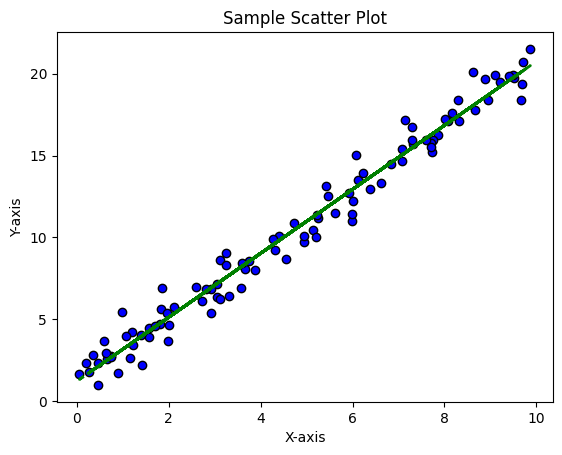

True Intercept: 1, True Slope: 2
Estimated Intercept: 1.2151, Estimated Slope: 1.9540
Mean Squared Error (MSE): 0.8066


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm


np.random.seed(42)
n_observations = 100

x = np.random.rand(n_observations) * 10  # Values between 0 and 10

# Define the true relationship (linear with some noise)
true_slope = 2
true_intercept = 1
noise_level = 1

# Generate y values based on the true relationship and add some noise
y = true_slope * x + true_intercept + np.random.normal(0, noise_level, n_observations)

# Estimate model using OLS
X_ols = sm.add_constant(x)  # Add intercept term
model = sm.OLS(y, X_ols).fit()
estimated_intercept, estimated_slope = model.params
y_estimated = estimated_slope * x + estimated_intercept

# Compute Mean Squared Error (MSE)
y_pred = estimated_slope * x + estimated_intercept
mse = np.mean((y - y_pred) ** 2)


# Create a plot
plt.scatter(x, y, color='blue', marker='o', edgecolors='black')
plt.plot(x, y_estimated, color='green', linestyle='--', linewidth=2, label="OLS")

plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Sample Scatter Plot")

# Display the plot
plt.show()

print(f"True Intercept: {true_intercept}, True Slope: {true_slope}")
print(f"Estimated Intercept: {estimated_intercept:.4f}, Estimated Slope: {estimated_slope:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")

# Quick Questions:
- Why isn't the estimated intercept 1?
- Why isn't the estimated slope 2?
- The MSE is 0.8, do we expect MSE to ever be 0 (with real data)?

# Univariate OLS, the gradient way

In this implementation, we will **not** use linear algebra or a pre-canned function to solve OLS. Instead we will use gradient descent!


A simple linear model is:  

$$
y = m \mathbf{X} + b
$$

We want to identify $m, b$ given $X, y$

1. Define a cost function - for OLS we will use half Mean Squared Error (MSE) $$
C(m, b) = \frac{1}{2n} \sum_{i=1}^{n} (y_i - (\hat{m} x_i + \hat{b}))^2
$$
1. Set initial, arbitrary values for $m, b$ (lets use 0,0)
1. Predict $y$. $$
\hat{y} = m x + b
$$
1. Compute the gradient: find the partial derivative of the cost function for m and b.
  - $$
\frac{\partial C}{\partial m} = \frac{1}{n} \sum_{i=1}^{n} x_i (y_i - \hat{y}_i) $$
  - $$
\frac{\partial C}{\partial b} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)
$$

1. Update $m, b$ using the gradient and a learning rate
1. Repeat 3 to 5




# Group Work
- Note: Use the top menu `Runtime > Restart Session` to reset your cells if things start getting weird
- I reccomend having one person share their screen as you work through this

# Quick Questions
- Explain the cost function in your own words $$ C(m, b) = \frac{1}{n} \sum_{i=1}^{n} (y_i - (\hat{m} x_i + \hat{b}))^2
$$
- Explain what a partial derivative is

In [ ]:
# Step 1: Define the cost function (Mean Squared Error)
def compute_cost(m, b, x, y):

    # your code here

    return cost


In [ ]:
# Step 2, 3: Set initial 0 values for m and b, and predict y
m = 0  # Initial slope
b = 0  # Initial intercept

def predict(m, b, x):

    # your code here

    return y_pred

y_pred = predict(m, b, x)

print(y[0:4]) # print the first 5 values as a check
print(y_pred[0:4])
print(compute_cost(m, b, x, y))

Quick check, you should be printing all 0's for y_pred above. Why?

In [ ]:
# Step 4, 5: Compute the gradient, update m and b
def compute_gradients(x, y, y_pred):
    # your code here, reference the equations provided above
    # You can use the function `np.sum` for the summation notation

    return dm, db #  Gradient with respect to m, b

def update_parameters(m, b, dm, db, learning_rate=0.01):
    # your code here
    return m, b

dm, db = compute_gradients(x, y, y_pred)
print(f"m-gradient = {dm:.1f}, b-gradient = {db:.1f}")

m, b = update_parameters(m, b, dm, db)
print(f"New m = {m:.2f}, New b = {b:.2f}")
print(f"Cost = {compute_cost(m, b, x, y)}")

Looking at the output above, what would happen if we didn't use a learning rate? Did cost go up or down?

# Put it together
Create a loop to repeat steps 3-5, run it three times print m, b and cost for each step

In [ ]:
# Your code here

In [ ]:
# Now run it 1000 times. Only print final versions of m, b, and cost


print(f"m = {m:.2f}, b = {b:.2f}, cost = {compute_cost(m, b, x, y):.2f}")

What are some possible stopping rules for this loop?
Designate one person from your group to talk through your solution

# Finished early?
- Discuss with your group applied education ML cases you are familiar with